# Введение в искусственные нейронные сети

# Урок 4. Сверточные нейронные сети

# <font color='blue'>Практическое задание</font>

Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опционально) сравнить с точностью полносвязной сети для этой выборки
Вариант 2. (сложный)
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)


# Сеть AlexNet 

In [ ]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение


from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, Input  # Convolution (сверточный) слой
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization  
# Pooling слои

import os

In [ ]:
# Цветной датасет 10 классов, картинки 32x32 с цветными изображениями
# Есть cifar100 - 100 классов
from tensorflow.keras.datasets import cifar10

In [ ]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = False
num_predictions = 20
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
# Название классов из набора cifar10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170508288/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
np.argmax(y_train[0]), classes[int(np.argmax(y_train[0]))], y_train[0]

(6, 'лягушка', array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

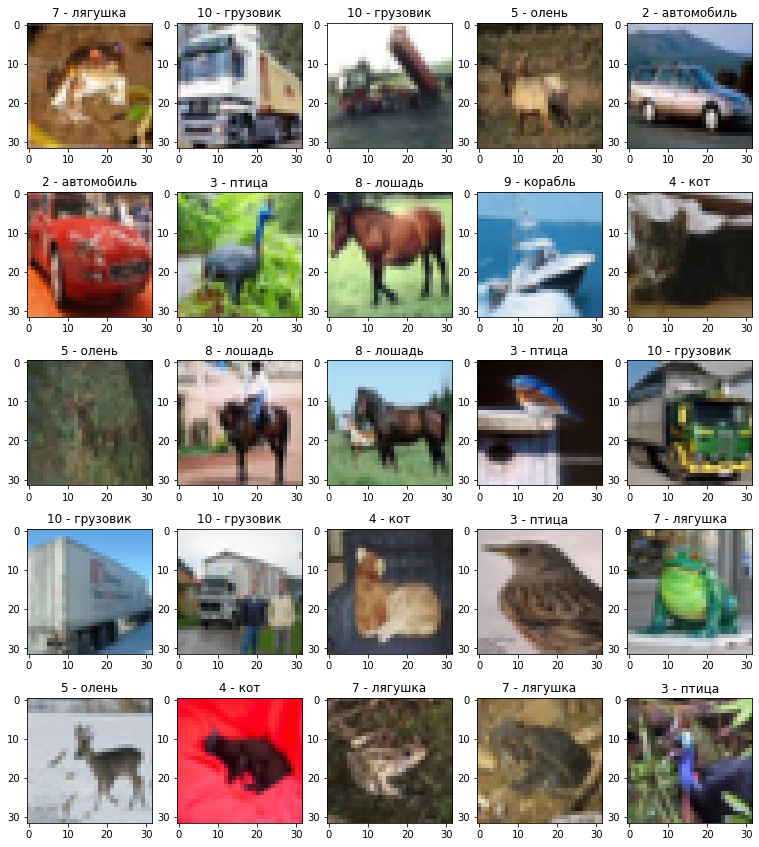

In [ ]:
# First 25 images in the train dataset
plt.figure(figsize = (13, 15))
for i in range(25):
    image = x_train[i,:,:]
    image = np.array(image)
    plt.subplot(5, 5, i+1)
    # plt.title(str(y_train[i]) + ' - ' + classes[int(y_train[i])])
    plt.title(str(np.argmax(y_train[i])+1) + ' - ' + classes[np.argmax(y_train[i])])
    plt.imshow(image)
    # plt.axis('off')
plt.show() 

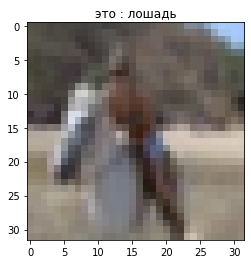

In [ ]:
N = 9013
# N = 913

plt.imshow(x_test[N][:,:,:])
plt.title('это : ' + classes[np.argmax(y_test[N,:])])
plt.show()

# Сеть AlexNet 


1:56:00



- Convolution - свертка
- Subsampling - Подвыборка
- Full connection - Полное подключение
- Gaussian connecttings - Гауссовы соединения
- Overlapping - перекрытие
- dropout - выбывать
- max-pooling

In [ ]:
# установка параметров нейросети
# batch_size = 1024
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = False
num_predictions = 20
model_name = 'keras_cifar10_trained_model.h5'

###### Базовая модель ( по аналогии как из 4 лекции)

 # Базовая модель

In [ ]:
# конфигурирование слоев нейросети
model = Sequential([
                    
    # слои нейросети отвественные за свертку и max-pooling
    Conv2D(filters=32,  # количество фильтров - эквивалентно кол-ву нейронов (ширина слоя)!!!
        kernel_size=(11, 11),  # кортеж, размер ядра фильтра (размер фильтра по осям, апертура фильтра)
        strides=(1, 1),   # шаг применения фильтра к пикселам (пропуск пикселов) - вместо пулинга
        input_shape=x_train.shape[1:],
        activation='relu',  # активация
        padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),

    Conv2D(filters=32,  # количество фильтров - эквивалентно кол-ву нейронов (ширина слоя)!!!
        kernel_size=(8, 8),  # кортеж размер ядра фильтра (размер фильтра по осям, апертура фильтра)
        strides=(1, 1),   # шаг применения фильтра к пикселам (пропуск пикселов) - вместо пулинга
        input_shape=x_train.shape[1:],
        activation='relu'  # активация
      ),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),
    
    Conv2D(filters=32, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    Dropout( 0.25),

    # Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    # Dropout(0.25),
    
    # Из конволютивного слоя нельзя передать информацию в плотный слой без векторизации
    # поэтому используем layers.Flatten() чтоб не делать reshape, сглаживание CNN выхода,
    # чтобы можно было его присоединить к полносвязногому слою.

    # полносвязные слои нейронной сети
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        11648     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          65568     
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 32)         1

In [ ]:
w_old = model.layers[-1].get_weights()
# Ядро 3x3
w_old[0].shape  # смотрим на одно ядро размер 3x3, 1 слой на входе, 1-но ядро на выходе
# (3, 3, 1, 1)


(512, 10)

In [ ]:
  summary_data = pd.DataFrame(columns=['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])

  print('Не используется data augmentation')
  hist = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 290s 185ms/step - loss: 1.8987 - accuracy: 0.2925 - val_loss: 4.4334 - val_accuracy: 0.1073
Epoch 2/10
1563/1563 [==============================] - 308s 197ms/step - loss: 1.6138 - accuracy: 0.4043 - val_loss: 1.7843 - val_accuracy: 0.3455
Epoch 3/10
1563/1563 [==============================] - 320s 205ms/step - loss: 1.4993 - accuracy: 0.4559 - val_loss: 1.5599 - val_accuracy: 0.4426
Epoch 4/10
1563/1563 [==============================] - 313s 200ms/step - loss: 1.4235 - accuracy: 0.4868 - val_loss: 1.7220 - val_accuracy: 0.4057
Epoch 5/10
1563/1563 [==============================] - 308s 197ms/step - loss: 1.3724 - accuracy: 0.5060 - val_loss: 1.6774 - val_accuracy: 0.4163
Epoch 6/10
1563/1563 [==============================] - 297s 190ms/step - loss: 1.3273 - accuracy: 0.5247 - val_loss: 1.9099 - val_accuracy: 0.3840
Epoch 7/10
1563/1563 [==============================] - 288s 184ms/step - loss

In [ ]:
# model evaluation for training set
loss_metric_train = model.evaluate(x_train, y_train)

# проверка работы обученной модели
loss_metric_test = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', loss_metric_test[0])
print('Test accuracy:', loss_metric_test[1])

summary_data.loc["Базовая модель", ['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy']] = [ 3,  32, loss_metric_train[0], loss_metric_train[1], loss_metric_test[0], loss_metric_test[1]]
summary_data

313/313 [==============================] - 13s 42ms/step - loss: 1.1647 - accuracy: 0.5800
Test loss: 1.164689302444458
Test accuracy: 0.5799999833106995


,layers,neurons,loss,accuracy,val_loss,val_accuracy
Базовая модель,3,32,1.1132,0.60148,1.16469,0.58


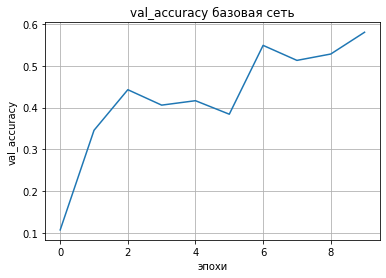

In [ ]:
plt.plot(np.arange(epochs), hist.history['val_accuracy'])
plt.title('val_accuracy базовая сеть', fontsize=12)
plt.ylabel('val_accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

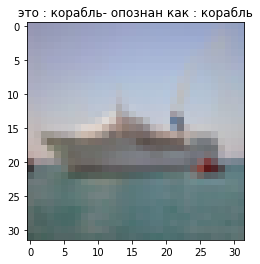

In [ ]:
N = 1011
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

# Оценим рост точности при увеличении ширины сети (больше ядер)
Модель:
- количество слоёв - 3
- количество нейронов в каждом слое - 64.

In [ ]:
# конфигурирование слоев нейросети
model_1 = Sequential([
                    
    # слои нейросети отвественные за свертку и max-pooling
    Conv2D(filters=64,  # количество фильтров - эквивалентно кол-ву нейронов (ширина слоя)!!!
        kernel_size=(11, 11),  # кортеж, размер ядра фильтра (размер фильтра по осям, апертура фильтра)
        strides=(1, 1),   # шаг применения фильтра к пикселам (пропуск пикселов) - вместо пулинга
        input_shape=x_train.shape[1:],
        activation='relu',  # активация
        padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),

    Conv2D(filters=64,  # количество фильтров - эквивалентно кол-ву нейронов (ширина слоя)!!!
        kernel_size=(8, 8),  # кортеж размер ядра фильтра (размер фильтра по осям, апертура фильтра)
        strides=(1, 1),   # шаг применения фильтра к пикселам (пропуск пикселов) - вместо пулинга
        input_shape=x_train.shape[1:],
        activation='relu'  # активация
      ),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),
    
    Conv2D(filters=64, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    Dropout( 0.25),

    # Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    # Dropout(0.25),
    
    # Из конволютивного слоя нельзя передать информацию в плотный слой без векторизации
    # поэтому используем layers.Flatten() чтоб не делать reshape, сглаживание CNN выхода,
    # чтобы можно было его присоединить к полносвязногому слою.

    # полносвязные слои нейронной сети
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        23296     
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          262208    
                                                                 
 batch_normalization_4 (Batc  (None, 8, 8, 64)        

In [ ]:
  print('Не используется data augmentation')
  hist = model_1.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 504s 322ms/step - loss: 1.8753 - accuracy: 0.3098 - val_loss: 2.1146 - val_accuracy: 0.3101
Epoch 2/10
1563/1563 [==============================] - 491s 314ms/step - loss: 1.5504 - accuracy: 0.4305 - val_loss: 1.8086 - val_accuracy: 0.3853
Epoch 3/10
1563/1563 [==============================] - 524s 335ms/step - loss: 1.4196 - accuracy: 0.4839 - val_loss: 1.6097 - val_accuracy: 0.4133
Epoch 4/10
1563/1563 [==============================] - 567s 363ms/step - loss: 1.3247 - accuracy: 0.5228 - val_loss: 1.7295 - val_accuracy: 0.4098
Epoch 5/10
1563/1563 [==============================] - 566s 362ms/step - loss: 1.2596 - accuracy: 0.5505 - val_loss: 1.8451 - val_accuracy: 0.4042
Epoch 6/10
1563/1563 [==============================] - 525s 336ms/step - loss: 1.2056 - accuracy: 0.5740 - val_loss: 1.2560 - val_accuracy: 0.5640
Epoch 7/10
1563/1563 [==============================] - 528s 338ms/step - loss

In [ ]:
# model evaluation for training set
loss_metric_train = model_1.evaluate(x_train, y_train)

# проверка работы обученной модели
loss_metric_test = model_1.evaluate(x_test, y_test, verbose=1)

print('Test loss:', loss_metric_test[0])
print('Test accuracy:', loss_metric_test[1])

summary_data.loc["Модель с увеличеной шириной сети", ['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy']] = [ 3,  64, loss_metric_train[0], loss_metric_train[1], loss_metric_test[0], loss_metric_test[1]]
summary_data

313/313 [==============================] - 23s 73ms/step - loss: 1.0179 - accuracy: 0.6357
Test loss: 1.017857551574707
Test accuracy: 0.635699987411499


,layers,neurons,loss,accuracy,val_loss,val_accuracy
Базовая модель,3,32,1.1132,0.60148,1.16469,0.58
Модель с увеличеной шириной сети,3,64,0.93682,0.66514,1.01786,0.6357


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


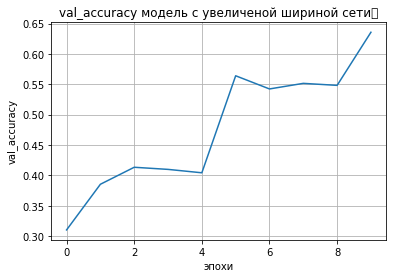

In [ ]:
plt.plot(np.arange(epochs), hist.history['val_accuracy'])
plt.title('val_accuracy модель с увеличеной шириной сети	', fontsize=12)
plt.ylabel('val_accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

Лучший результат - val_accuracy = 0.6357 это лучше чем у базовой модели (0.5808).

__Вывод__: 
С увеличением ширины сети точночть модели растёт.

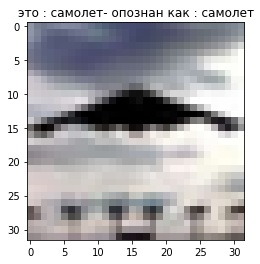

In [ ]:
N = 111
y_p=model_1.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

# Оценим рост точности при увеличении глубины сети (больше слоев).
Модель:
- количество слоёв - 5
- количество нейронов в каждом слое - 32.

In [ ]:
# конфигурирование слоев нейросети
model_2 = Sequential([
                    
    # слои нейросети отвественные за свертку и max-pooling
    Conv2D(filters=32,  # количество фильтров - эквивалентно кол-ву нейронов (ширина слоя)!!!
        kernel_size=(11, 11),  # кортеж, размер ядра фильтра (размер фильтра по осям, апертура фильтра)
        strides=(1, 1),   # шаг применения фильтра к пикселам (пропуск пикселов) - вместо пулинга
        input_shape=x_train.shape[1:],
        activation='relu',  # активация
        padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),

    Conv2D(filters=32,  # количество фильтров - эквивалентно кол-ву нейронов (ширина слоя)!!!
        kernel_size=(8, 8),  # кортеж размер ядра фильтра (размер фильтра по осям, апертура фильтра)
        strides=(1, 1),   # шаг применения фильтра к пикселам (пропуск пикселов) - вместо пулинга
        input_shape=x_train.shape[1:],
        activation='relu'  # активация
      ),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),
    
    Conv2D(filters=32, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    # MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    # Dropout( 0.25),

    # Добавляем 2 слоя
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    # MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    # Dropout( 0.25),

    Conv2D(filters=64, kernel_size=(1, 1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    Dropout(0.25),

    # Из конволютивного слоя нельзя передать информацию в плотный слой без векторизации
    # поэтому используем layers.Flatten() чтоб не делать reshape, сглаживание CNN выхода,
    # чтобы можно было его присоединить к полносвязногому слою.

    # полносвязные слои нейронной сети
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        11648     
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          65568     
                                                                 
 batch_normalization_7 (Batc  (None, 8, 8, 32)        

In [ ]:
  print('Не используется data augmentation')
  hist = model_2.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

Не используется data augmentation
Epoch 1/10
1563/1563 [==============================] - 291s 186ms/step - loss: 1.9562 - accuracy: 0.2766 - val_loss: 1.7058 - val_accuracy: 0.3708
Epoch 2/10
1563/1563 [==============================] - 306s 196ms/step - loss: 1.6366 - accuracy: 0.3977 - val_loss: 1.6850 - val_accuracy: 0.3900
Epoch 3/10
1563/1563 [==============================] - 312s 200ms/step - loss: 1.5213 - accuracy: 0.4454 - val_loss: 1.7853 - val_accuracy: 0.3915
Epoch 4/10
1563/1563 [==============================] - 302s 193ms/step - loss: 1.4432 - accuracy: 0.4802 - val_loss: 2.0177 - val_accuracy: 0.3466
Epoch 5/10
1563/1563 [==============================] - 305s 195ms/step - loss: 1.3861 - accuracy: 0.5032 - val_loss: 1.3586 - val_accuracy: 0.5076
Epoch 6/10
1563/1563 [==============================] - 301s 192ms/step - loss: 1.3432 - accuracy: 0.5178 - val_loss: 1.4731 - val_accuracy: 0.4599
Epoch 7/10
1563/1563 [==============================] - 300s 192ms/step - loss

In [ ]:
# model evaluation for training set
loss_metric_train = model_2.evaluate(x_train, y_train)

# проверка работы обученной модели
loss_metric_test = model_2.evaluate(x_test, y_test, verbose=1)

print('Test loss:', loss_metric_test[0])
print('Test accuracy:', loss_metric_test[1])

summary_data.loc["Модель с увеличенной глубиной сети", ['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy']] = [ 5,  32, loss_metric_train[0], loss_metric_train[1], loss_metric_test[0], loss_metric_test[1]]
summary_data

313/313 [==============================] - 14s 43ms/step - loss: 1.2809 - accuracy: 0.5520
Test loss: 1.2809213399887085
Test accuracy: 0.5519999861717224


,layers,neurons,loss,accuracy,val_loss,val_accuracy
Базовая модель,3,32,1.1132,0.60148,1.16469,0.58
Модель с увеличеной шириной сети,3,64,0.93682,0.66514,1.01786,0.6357
Модель с увеличенной глубиной сети,5,32,1.22475,0.56654,1.28092,0.552


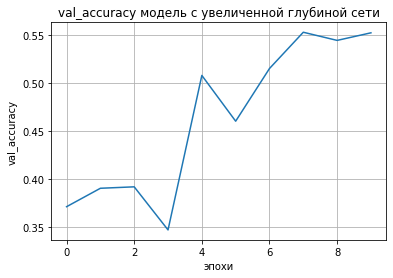

In [ ]:
plt.plot(np.arange(epochs), hist.history['val_accuracy'])
plt.title('val_accuracy модель с увеличенной глубиной сети', fontsize=12)
plt.ylabel('val_accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

Лучший результат - val_accuracy = 0.552 это хуже чем у базовой модели (0.58)и хуже чем у модели с большой ширингой слоя (0.6357).

__Вывод__: 
С увеличением глубины сети на данном датасете точность модели не улучшается по сравнению с базовой модель.


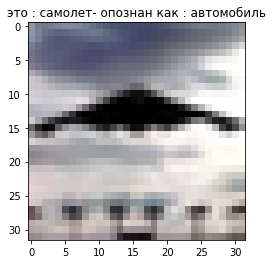

In [ ]:
N = 111
y_p=model_2.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

# *(опционально) сравнить с точностью полносвязной сети для этой выборки

In [ ]:
# конфигурирование слоев нейросети
model_3 = Sequential([
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# model_2.summary()

In [ ]:
  hist = model_3.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9470 - accuracy: 0.2990 - val_loss: 1.7819 - val_accuracy: 0.3729
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.7893 - accuracy: 0.3646 - val_loss: 1.7319 - val_accuracy: 0.3833
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.7250 - accuracy: 0.3891 - val_loss: 1.6505 - val_accuracy: 0.4173
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6869 - accuracy: 0.4043 - val_loss: 1.6045 - val_accuracy: 0.4357
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6563 - accuracy: 0.4155 - val_loss: 1.5859 - val_accuracy: 0.4429
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6282 - accuracy: 0.4261 - val_loss: 1.5495 - val_accuracy: 0.4603
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6032 - accuracy: 0.4352 - val_loss: 1.5367 -

In [ ]:
# model evaluation for training set
loss_metric_train = model_3.evaluate(x_train, y_train)

# проверка работы обученной модели
loss_metric_test = model_2.evaluate(x_test, y_test, verbose=1)

print('Test loss:', loss_metric_test[0])
print('Test accuracy:', loss_metric_test[1])

summary_data.loc["Полносвязная сеть", ['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy']] = [ 5,  32, loss_metric_train[0], loss_metric_train[1], loss_metric_test[0], loss_metric_test[1]]

313/313 [==============================] - 14s 46ms/step - loss: 1.3161 - accuracy: 0.5459
Test loss: 1.3160786628723145
Test accuracy: 0.5458999872207642


In [ ]:
summary_data

,layers,neurons,loss,accuracy,val_loss,val_accuracy
Базовая модель,3,32,1.1132,0.60148,1.16469,0.58
Модель с увеличеной шириной сети,3,64,0.93682,0.66514,1.01786,0.6357
Модель с увеличенной глубиной сети,5,32,1.22475,0.56654,1.28092,0.552
Полносвязная сеть,5,32,1.46268,0.49376,1.31608,0.5459


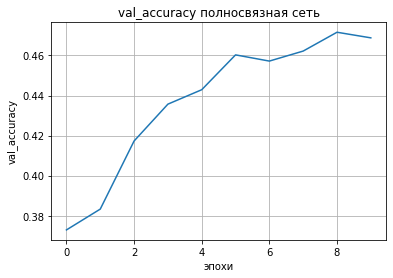

In [ ]:
plt.plot(np.arange(epochs), hist.history['val_accuracy'])
plt.title('val_accuracy полносвязная сеть', fontsize=12)
plt.ylabel('val_accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

Лучший результат - val_accuracy = 0.5459 это хуже чем у остальных моделей.

__Вывод__: 
Полносвязная сеть показала результат хуже, чем результат всех моделей. 

Таким оброзом наибольший эффект для данной выборки играет увеличение количества нейронов.

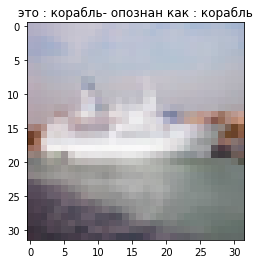

In [ ]:
N = 1111
y_p=model_3.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()